In [79]:
import numpy as np
from matplotlib import pyplot as plt
import math as m
from IPython.display import display, clear_output

In [49]:
a = 0
b = 10

In [56]:
X = [a+((b-a)*i)/100 for i in range(101)]
Y = [fx(x) for x in X] 

In [50]:
def fx(x):
    return m.log(x*x+3*x+1)-m.cos(2*x+1)

def dfx(x):
    return (2*x+3)/(x*x+3*x+1)+2*m.sin(2*x+1)

In [99]:
def dyhotomy(a, b, eps, f, graph = False, graph1 = False): #предпологаем что есть корни      
    i = 0
    if(graph):
        X = [a+((b-a)*i)/100 for i in range(101)]
        Y = [f(x) for x in X] 
    while abs(f(b)-f(a)) > eps:
        
        i+=1
        mid = (a+b) / 2
        
        if (graph):
            
            plt.pause(0.5)
            clear_output(wait = True)
            
            
            plt.plot(X,Y)
            plt.plot(mid, f(mid), ':o')
            plt.hlines(0, X[0], X[100], 'black')
            plt.show()
        if(graph1): 
            plt.pause(0.5)
            clear_output(wait = True)
            
            X1 = [a+((b-a)*i)/100 for i in range(101)]
            Y1 = [f(x) for x in X1] 
            plt.plot(X1,Y1)
            plt.plot(mid, f(mid), ':o')
            plt.hlines(0, a, b, 'black')
            plt.show()
        
        if abs(f(mid)) < eps:
            return mid , i
        elif f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid

In [101]:
def NewtonsMethod(a, b, eps, f, df, graph = False, graph1 = False): #теоретически может не сойтись
    try:
        xn = (a+b) / 2 
        xn1 = xn - f(xn)/df(xn)
        i = 0
        
        if(graph):
            X = [a+((b-a)*i)/100 for i in range(101)]
            Y = [f(x) for x in X] 
            
        while abs(xn1 - xn) > eps:
            
            if (graph):
            
                plt.pause(0.5)
                clear_output(wait = True)
            
                plt.plot(X,Y)
                plt.plot(xn1, f(xn1), ':o')
                plt.hlines(0, X[0], X[100], 'black')
                plt.show()
            if(graph1): 
            
                plt.pause(0.5)
                clear_output(wait = True)
            
                X1 = [a+((b-a)*i)/100 for i in range(101)]
                Y1 = [f(x) for x in X1] 
                plt.plot(X1,Y1)
                plt.plot(xn1, f(xn1), ':o')
                plt.hlines(0, a, b, 'black')
                plt.show()
                
            i+=1
            xn = xn1
            xn1 = xn - f(xn)/df(xn)
        
        return xn1, i
    except:

        print("no solution")

In [55]:
E = [0.001, 0.000001, 0.000000001]
for e in E:
    x1, i1 = dyhotomy(a, b, e, fx)
    x2 , i2 = NewtonsMethod(a, b, e, fx, dfx)
    print(f"Dehotomy: x = {x1}, iteration = {i1}, epsilon = {e}")  
    print(f"Newtons Method: x = {x2}, iteration = {i1}, epsilon = {e}")

Dehotomy: x = 0.1214599609375, iteration = 14, epsilon = 0.001
Newtons Method: x = 0.12159628819834177, iteration = 14, epsilon = 0.001
Dehotomy: x = 0.12159645557403564, iteration = 24, epsilon = 1e-06
Newtons Method: x = 0.12159629113899129, iteration = 24, epsilon = 1e-06
Dehotomy: x = 0.12159629113739356, iteration = 35, epsilon = 1e-09
Newtons Method: x = 0.1215962911389913, iteration = 35, epsilon = 1e-09


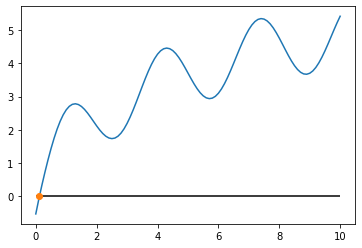

(0.1214599609375, 14)

In [105]:
dyhotomy(a, b, 0.001, fx, graph = True)

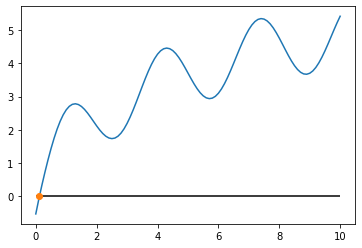

(0.12159628819834177, 6)

In [106]:
NewtonsMethod(a, b, 0.001, fx, dfx, graph = True)